# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [24]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import metrics

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [5]:
# your code here
a = X[36000]
a

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

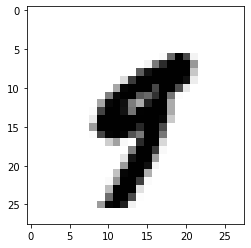

In [6]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline

b = a.reshape((28,28))
plt.imshow(b, cmap = plt.cm.binary, interpolation="nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [7]:
# your code here
y[36000]

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [8]:
# your code here
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [9]:
# your code here
import numpy as np

#y_train = [x for x in y_train if x == '5']
#y_test = [x for x in y_test if x == '5']
y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)
len(y_train_5)

60000

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [10]:
# your code here
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train_5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Does the classifier predict correctly the 36000th digit we picked before?

In [11]:
# your code here
clf.predict(X[36000].reshape(1, -1))

array([0])

In [12]:
# your comments here
# 9  != 5. Thats why the output is 0

#### The 35th value is a 5. Check if it was correctly predicted.

In [13]:
# your code here
clf.predict(X[35].reshape(1, -1))

array([1])

In [14]:
# your comments here
# the 35th element ==5. So we have result 1 and it is a True

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [15]:
# Libraries
from sklearn.base import BaseEstimator

In [16]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [17]:
# your code here
never_5_clf.fit(X_train)

In [18]:
never_5_clf.predict(X[36000].reshape(1, -1))

array([0.])

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [19]:
# your code here
from sklearn.metrics import confusion_matrix

y_pred_test_rf = clf.predict(X_test)

print('logistic regresson: \n',confusion_matrix(y_test_5, y_pred_test_rf) )

y_pred_test_rf1 = never_5_clf.predict(X_test)

print('Never5Classifier: \n',confusion_matrix(y_test_5, y_pred_test_rf1) )

logistic regresson: 
 [[9027   81]
 [ 145  747]]
Never5Classifier: 
 [[9108    0]
 [ 892    0]]


In [20]:
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test_5, y_pred_test_rf, average='weighted')[0:3])


print(precision_recall_fscore_support(y_test_5, y_pred_test_rf1, average='weighted')[0:3])

(0.9768750905402074, 0.9774, 0.9770190972469596)
(0.82955664, 0.9108, 0.8682820180029306)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here
# The logistic regression works better and makes less number of mistakes

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

Text(0.5, 1.0, 'Never5')

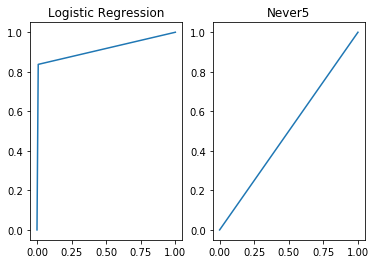

In [25]:
# your code here
fpr_log, tpr_log, _ = metrics.roc_curve(y_test_5, y_pred_test_rf)
fpr_never, tpr_never, _ = metrics.roc_curve(y_test_5, y_pred_test_rf1)


fig, ax = plt.subplots(1, 2)
ax[0].plot(fpr_log,tpr_log)
ax[0].set_title('Logistic Regression')
ax[1].plot(fpr_never,tpr_never)
ax[1].set_title('Never5')

#### Now find the roc_auc_score for each. 

In [26]:
# your code here
auc_log = metrics.roc_auc_score(y_test_5, y_pred_test_rf)
print('auc Logistic Regression', auc_log)

auc_never = metrics.roc_auc_score(y_test_5, y_pred_test_rf1)
print('auc Logistic Regression', auc_never)

auc Logistic Regression 0.914275332777965
auc Logistic Regression 0.5


#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here
# The logistic regression works better with metrics